# Table of Contents

#### 1. Import libraries and data
#### 2. Data Cleaning
#### 3. Elbow Technique
#### 4. Number of clusters decision
#### 5. k-means algorithm
#### 6. Visualizations
            Yield vs Rainfall
            Yield vs Temperature
            Yield vs Days to Harvest
            Rainfall vs Temperature
            Rainfall vs Days to Harvest
            Days to Harvest vs Temperature
#### 7. Calculating descriptive statistics of the clusters
#### 8. Merge the two datasets
#### 9. Analyzing categorical variables
#### 10. Export data

## 1. Import libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [ ]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
# create shortcut path
path = r"C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis"

In [ ]:
# import data set
df_crop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'crop_yield_v2.pkl'))

In [8]:
df_crop.shape

(1000000, 13)

In [9]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
 10  Rainfall_group          1000000 non-null  object 
 11  Temperature_range       1000000 non-null  object 
 12  Harvest_range           1000000 non-null  object 
dtypes: bool(2), float64(3), int64(1), object(7)
memory usage: 

In [10]:
df_crop.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare Rainfall_group Temperature_range      Harvest_range  
0                6.555816      Very High              Warm   Extended Harvest  
1                8.527341      Very High              Cool   Extended Harvest  
2                1.127443       Very Low              Warm  Long-Term Harvest  
3                6.517573      Very High              Cool   Extended Harvest  
4                7.248251           High               Hot  Long-Term Harvest

In [11]:
df_crop.describe()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649518  
std                  1.696443  
min                  0.000000  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372

## 2. Data Cleaning

In [13]:
# creating new dataframe without the categorical columns

df = df_crop[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']]

In [14]:
df.head()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  Yield_tons_per_hectare
0   897.077239            27.676966              122                6.555816
1   992.673282            18.026142              140                8.527341
2   147.998025            29.794042              106                1.127443
3   986.866331            16.644190              146                6.517573
4   730.379174            31.620687              110                7.248251

## 3. Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

[-68251235102.13702,
 -17609189890.128445,
 -8238896181.7077055,
 -4944351481.399673,
 -3427564982.765621,
 -2606703983.6323404,
 -2107685178.1998217,
 -1781033130.9873788,
 -1560377852.4968348]

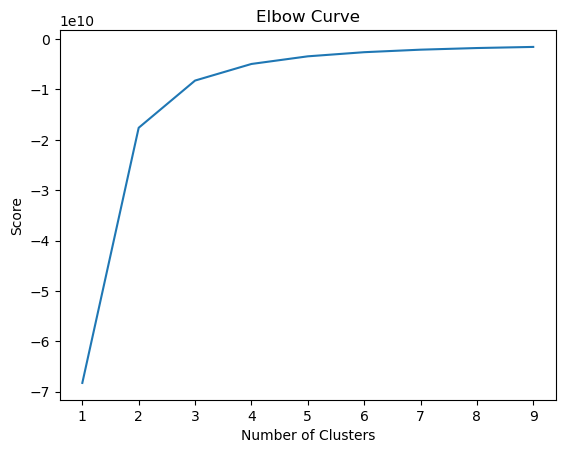

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Number of clusters decision

There is a large jump from two to three on the x-axis, but after the curve it straightens out. It goes even flatter from three to four, but it seems there is a diminshing return at four. I am going to use three as my optimal count for the clusters and decide if I want to update it to four based on the results and see which one gives me the best interpretation of the data.

## 5. k-means algorithm

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_15112\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [25]:
df.head()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  Yield_tons_per_hectare  \
0   897.077239            27.676966              122                6.555816   
1   992.673282            18.026142              140                8.527341   
2   147.998025            29.794042              106                1.127443   
3   986.866331            16.644190              146                6.517573   
4   730.379174            31.620687              110                7.248251   

   clusters  
0         0  
1         0  
2         1  
3         0  
4         0

In [26]:
df['clusters'].value_counts()

clusters
1    335160
2    333236
0    331604
Name: count, dtype: int64

## 6. Visualizations

### Yield vs Rainfall

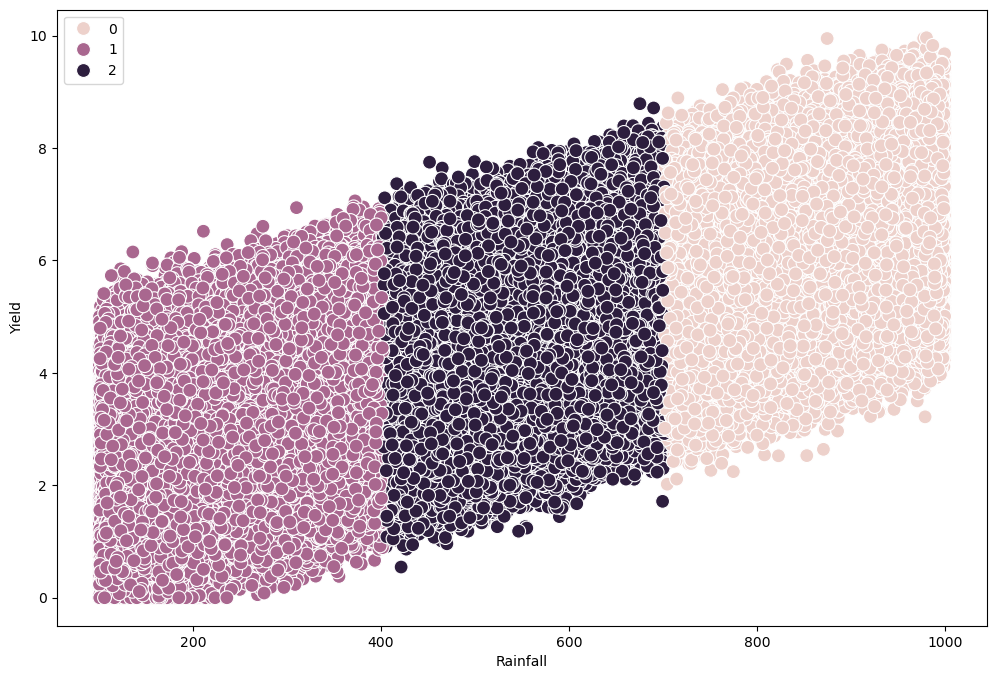

In [29]:
# Plot the clusters for the "Yield_tons_per_hectare" and "Rainfall_mm" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Rainfall_mm'], y=df['Yield_tons_per_hectare'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rainfall') # Label x-axis.
plt.ylabel('Yield') # Label y-axis.
plt.show()

The cluster make sense in this graph, showing that crops with a rainfall of ~700 millimeters or greater will produce at least 2 hectares of yield and greater. Rainfall between 400 and 700 millimeters will produce a yield between ~0.75 to ~8 hectares of yield. Rainfall maxing out at 400 millimeters will produce up to ~7 hectares of yield. Rainfall is the most important variable when it comes to predicting yield, and in the areas where ~700 millimeters of rainfall isn't produced, I would look into if irrigation is used to mitigate the lower rainfall amount.

### Yield vs Temperature

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


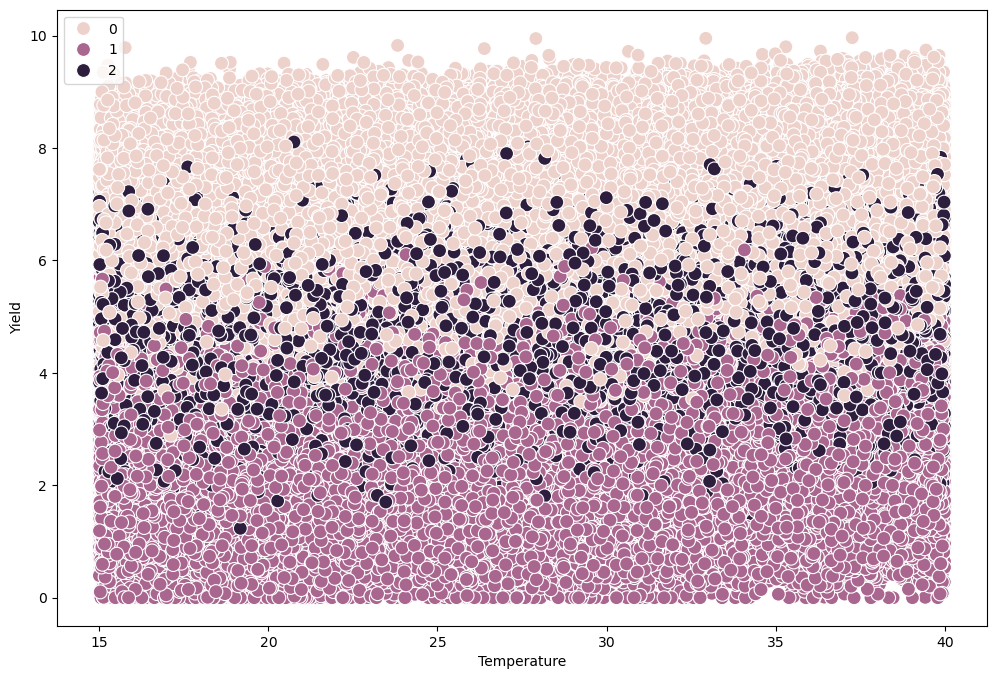

In [32]:
# Plot the clusters for the "Yield_tons_per_hectare" and "Temperature_Celsius" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Temperature_Celsius'], y=df['Yield_tons_per_hectare'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Temperature') # Label x-axis.
plt.ylabel('Yield') # Label y-axis.
plt.show()

The graph of Yield vs Temperature does not tell me much because the yields are evenly dispured across the axis, indicating that temperature is not a factor and other variables need to analyzed, maybe it is crop dependent.

### Yield vs Days to Harvest

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


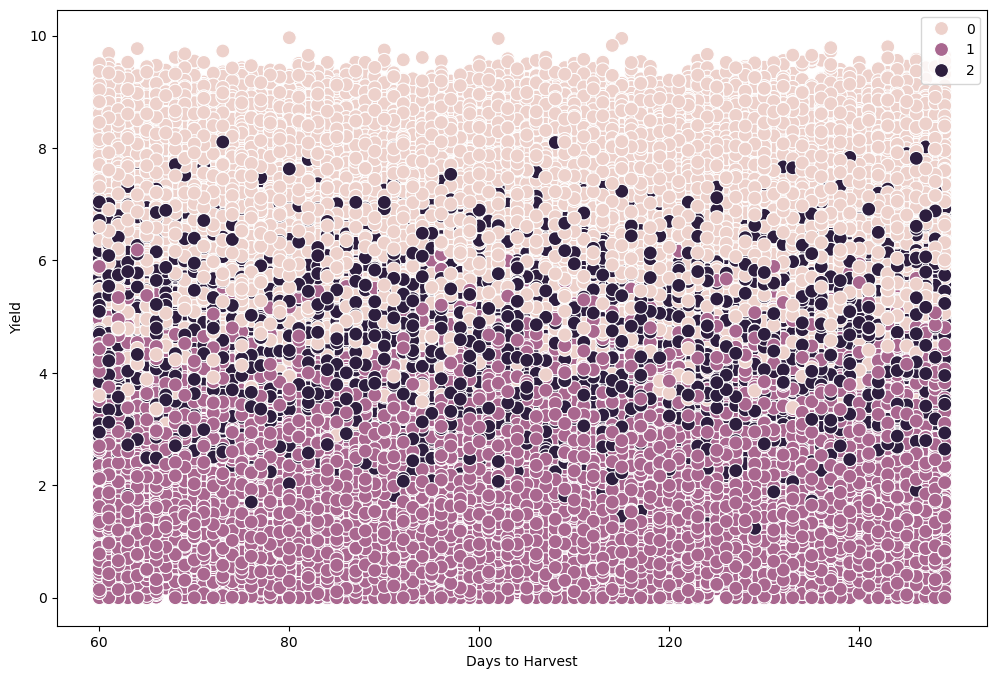

In [35]:
# Plot the clusters for the "Yield_tons_per_hectare" and "Days_to_harvest" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Days_to_Harvest'], y=df['Yield_tons_per_hectare'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Days to Harvest') # Label x-axis.
plt.ylabel('Yield') # Label y-axis.
plt.show()

Similar to the graph above, Yield and Days to Harvest doesn't provide valuable insights. I would look into the higher yields and see what insights are available.

### Rainfall vs Temperature

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


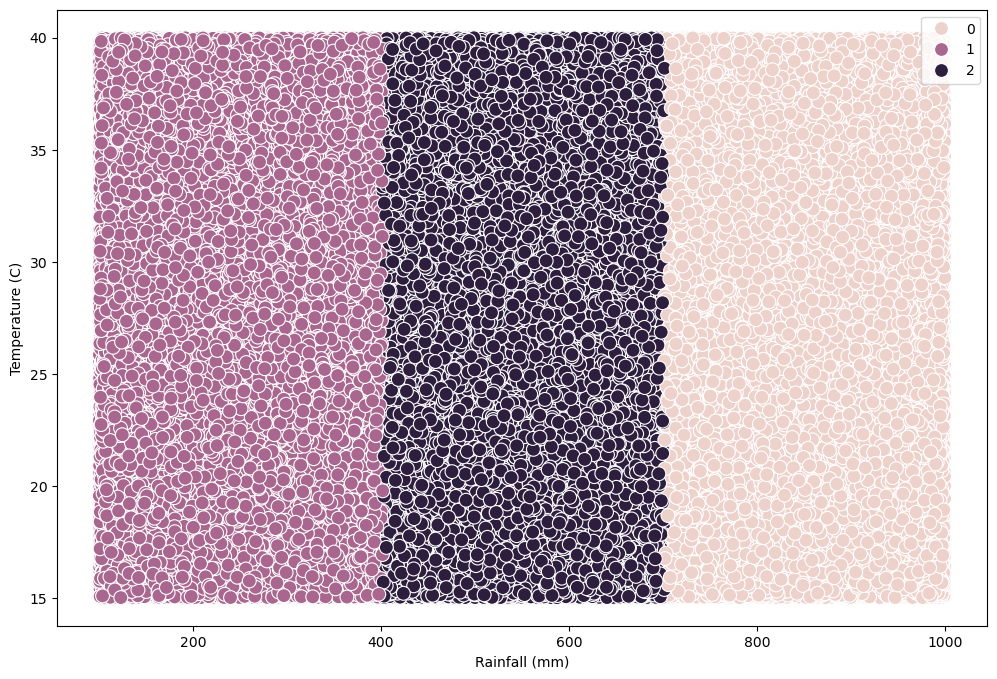

In [38]:
# Plot the clusters for the "Rainfall_mm" and "Temperature_Celsius" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Rainfall_mm'], y=df['Temperature_Celsius'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rainfall (mm)') # Label x-axis.
plt.ylabel('Temperature (C)') # Label y-axis.
plt.show()

The largest observation to note is that the clustered are only tied to the rainfall amount as described in the first graph.

### Rainfall vs Days to Harvest

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


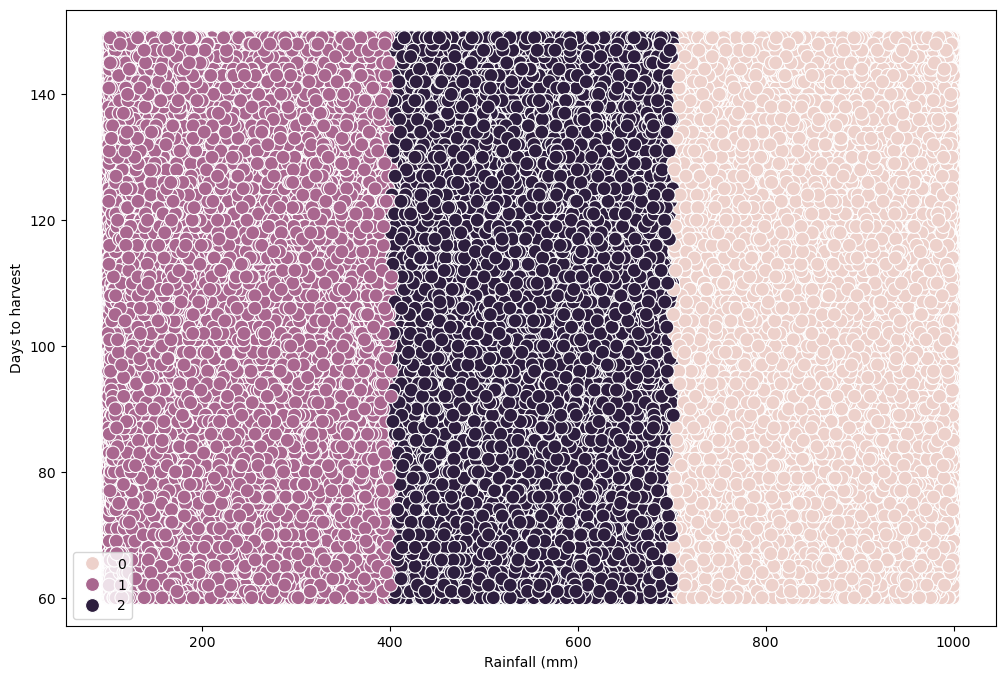

In [41]:
# Plot the clusters for the "Rainfall_mm" and "Days_to_harvest" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Rainfall_mm'], y=df['Days_to_Harvest'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rainfall (mm)') # Label x-axis.
plt.ylabel('Days to harvest') # Label y-axis.
plt.show()

The largest observation to note is that the clustered are only tied to the rainfall amount as described in the first graph.

### Days to Harvest vs Temperature

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


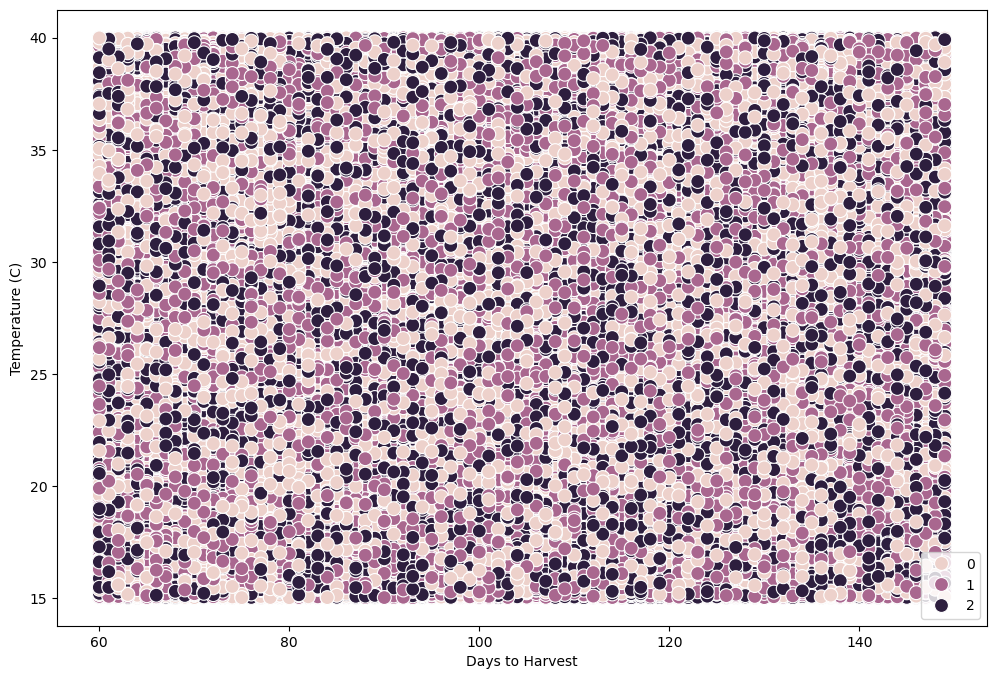

In [44]:
# Plot the clusters for the "Days to Harvest" and "Temperature_Celsius" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Days_to_Harvest'], y=df['Temperature_Celsius'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Days to Harvest') # Label x-axis.
plt.ylabel('Temperature (C)') # Label y-axis.
plt.show()

There is no observation to see here because all of the cluster are scattered throughout the graph, indicating no pattern was found.

## 7. Calculating descriptive statistics of the clusters

In [47]:
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\HP\AppData\Local\Temp\ipykernel_15112\4181167376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 2, 'cluster'] = 'black'


In [48]:
df.groupby('cluster').agg({'Yield_tons_per_hectare':['min', 'mean', 'median', 'max'],
                          'Rainfall_mm':['min', 'mean', 'median', 'max'],
                          'Temperature_Celsius':['min', 'mean', 'median', 'max'],
                          'Days_to_Harvest':['min', 'mean', 'median', 'max']})

Yield_tons_per_hectare                               Rainfall_mm  \
                           min      mean    median       max         min   
cluster                                                                    
black                 0.546069  4.660124  4.661757  8.789923  401.713324   
pink                  2.019971  6.150115  6.149783  9.963372  701.721506   
purple                0.000000  3.154296  3.153339  7.060246  100.000896   

                                            Temperature_Celsius             \
               mean      median         max                 min       mean   
cluster                                                                      
black    551.757913  551.787894  701.749359           15.000034  27.507195   
pink     850.699834  850.786946  999.998098           15.000085  27.503649   
purple   250.688726  250.574295  401.735443           15.000196  27.504050   

                              Days_to_Harvest                          
            median        max             min        mean median  max  
cluster                                                                
black    27.517588  39.999932              60  104.497713  105.0  149  
pink     27.515987  39.999997              60  104.412408  104.0  149  
purple   27.493302  39.999974              60  104.574093  105.0  149

**Purple:**
- Yield: the mean yield is 6.15 tons/hectare, indicating the highest yield potential of all clusters
- Rainfall: this cluster experiences the highest rainfall ranging from 701 to 999 mm, with a mean of 850 mm. This indicates this cluster is exposed to heavy rainfall.
- Across all clusters, the mean temperature is consistent arounf 27.5C suggesting temperature is not a primary factor influencing the differences in yield across the clusters
- The mean days is slightly lower than the other two, yet has the highest yield. This indicates that rainfall can potentially speed up the harvest time.
- Overall, this is the high rainfall and high yield cluster. This could represent regions with abundant water supporting high crop productivity.

**Black:**
- Yield: The mean yield is 4.68 tons/hectare, indicating moderate yield.
- Rainfall: this cluster ranges from 401 to 701 mm, with a mean rainfall of 551 mm, indicating moderate rainfall.
- The mean days to harvest is 104.5 days with moderate yields, indicating the cluster is consistent in having crops that mature fast enough to produce a desirable yield.
- This cluster could represent regions with ideal growing conditions that do not experience extreme rainfall, but still produce high yields.

**Pink:**
- Yield: The mean yield is the lowest at 3.15 tons/hectare, with a max yield of 7.06 tons/hectare. This cluster has the lowest crop yields.
- Rainfall: this cluster ranges from 100 to 401 mm, with a mean of 250 mm indicating drier conditions. This suggests a relationship between lower rainfall and lower crop yield.
- The days to harvest is similar to the other clusters with a mean of 104.6 days, but lower yields. This suggests that other factors such as rainfall are influencing the lower yields despite similar harvest times.
- This cluster is the low rainfall and low yield, representing drier regions and poorer growing conditions.

**Overall:**
- Rainfall plays a key role in determing crop yield.
- The temperature and days to harvest are relatively consistent across the clusters and do not appear to be strong drivers of yield.

In [50]:
df.head()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  Yield_tons_per_hectare  \
0   897.077239            27.676966              122                6.555816   
1   992.673282            18.026142              140                8.527341   
2   147.998025            29.794042              106                1.127443   
3   986.866331            16.644190              146                6.517573   
4   730.379174            31.620687              110                7.248251   

   clusters cluster  
0         0    pink  
1         0    pink  
2         1  purple  
3         0    pink  
4         0    pink

## 8. Merge the two datasets

In [52]:
# selecting the columns I want to merge
df_subset = df[['Yield_tons_per_hectare', 'clusters', 'cluster']]

In [53]:
# creating index columns for df_crop and df_subset

df_crop['index'] = df_crop.index
df_subset['index'] = df_subset.index

C:\Users\HP\AppData\Local\Temp\ipykernel_15112\2113410798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['index'] = df_subset.index


In [54]:
df_crop.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare Rainfall_group Temperature_range      Harvest_range  \
0                6.555816      Very High              Warm   Extended Harvest   
1                8.527341      Very High              Cool   Extended Harvest   
2                1.127443       Very Low              Warm  Long-Term Harvest   
3                6.517573      Very High              Cool   Extended Harvest   
4                7.248251           High               Hot  Long-Term Harvest   

   index  
0      0  
1      1  
2      2  
3      3  
4      4

In [55]:
df_subset.head()

Yield_tons_per_hectare  clusters cluster  index
0                6.555816         0    pink      0
1                8.527341         0    pink      1
2                1.127443         1  purple      2
3                6.517573         0    pink      3
4                7.248251         0    pink      4

In [56]:
# merge the two data sets
df_merged = df_crop.merge(df_subset, on = 'index', indicator = True)

In [57]:
# confirming merge was successful
df_merged['_merge'].value_counts()

_merge
both          1000000
left_only           0
right_only          0
Name: count, dtype: int64

In [58]:
df_merged.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare_x Rainfall_group Temperature_range  \
0                  6.555816      Very High              Warm   
1                  8.527341      Very High              Cool   
2                  1.127443       Very Low              Warm   
3                  6.517573      Very High              Cool   
4                  7.248251           High               Hot   

       Harvest_range  index  Yield_tons_per_hectare_y  clusters cluster _merge  
0   Extended Harvest      0                  6.555816         0    pink   both  
1   Extended Harvest      1                  8.527341         0    pink   both  
2  Long-Term Harvest      2                  1.127443         1  purple   both  
3   Extended Harvest      3                  6.517573         0    pink   both  
4  Long-Term Harvest      4                  7.248251         0    pink   both

In [59]:
# dropping columns that aren't needed

df_merged.drop(columns=['Yield_tons_per_hectare_y'], inplace=True)
df_merged.drop(columns=['_merge'], inplace=True)

In [60]:
# renaming yield column
df_merged.rename(columns = {'Yield_tons_per_hectare_x' : 'Yield_tons_per_hectare'}, inplace = True)

In [61]:
df_merged.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare Rainfall_group Temperature_range      Harvest_range  \
0                6.555816      Very High              Warm   Extended Harvest   
1                8.527341      Very High              Cool   Extended Harvest   
2                1.127443       Very Low              Warm  Long-Term Harvest   
3                6.517573      Very High              Cool   Extended Harvest   
4                7.248251           High               Hot  Long-Term Harvest   

   index  clusters cluster  
0      0         0    pink  
1      1         0    pink  
2      2         1  purple  
3      3         0    pink  
4      4         0    pink

In [62]:
# checking for missing values
df_merged.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
Rainfall_group            0
Temperature_range         0
Harvest_range             0
index                     0
clusters                  0
cluster                   0
dtype: int64

No missing values

In [64]:
# checking for duplicates
df_dups = df_merged[df_merged.duplicated()]

In [65]:
df_dups

Empty DataFrame
Columns: [Region, Soil_Type, Crop, Rainfall_mm, Temperature_Celsius, Fertilizer_Used, Irrigation_Used, Weather_Condition, Days_to_Harvest, Yield_tons_per_hectare, Rainfall_group, Temperature_range, Harvest_range, index, clusters, cluster]
Index: []

No duplicate values

## 9. Analyzing categorical variables

Soil Type vs Clusters
Soil_Type  Chalky   Clay   Loam  Peaty  Sandy   Silt
cluster                                             
black       55620  55440  55639  55332  55444  55761
pink        55514  54997  55166  55223  55487  55217
purple      55645  55915  55990  55728  56188  55694

Crop vs Clusters
Crop     Barley  Cotton  Maize   Rice  Soybean  Wheat
cluster                                              
black     55571   55315  55402  55494    55612  55842
pink      55190   55412  55125  55441    55203  55233
purple    56016   55858  56297  55857    55534  55598

Fertilizer Used vs Clusters
Fertilizer_Used   False   True 
cluster                        
black            166654  166582
pink             165947  165657
purple           167459  167701

Irrigation Used vs Clusters
Irrigation_Used   False   True 
cluster                        
black            166362  166874
pink             166233  165371
purple           167914  167246

Weather Condition vs Clusters
Weather_Conditio

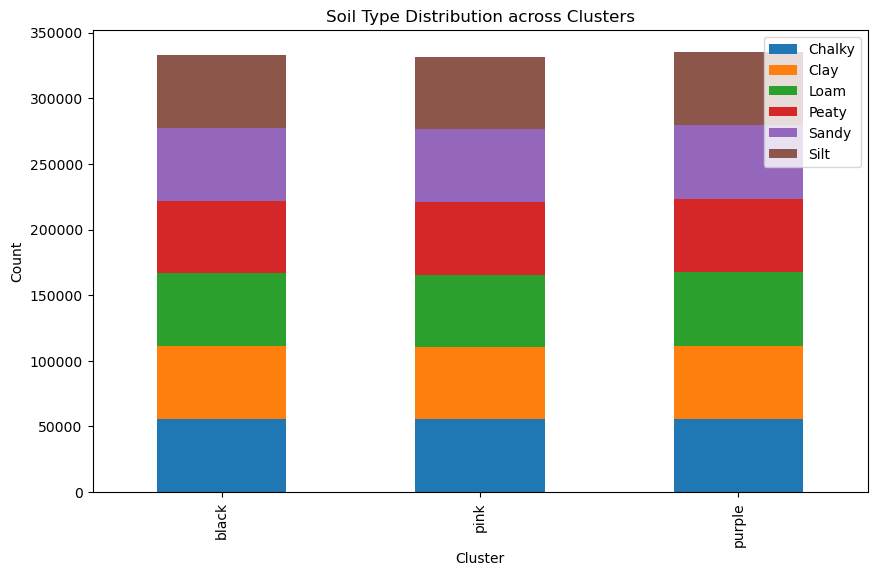

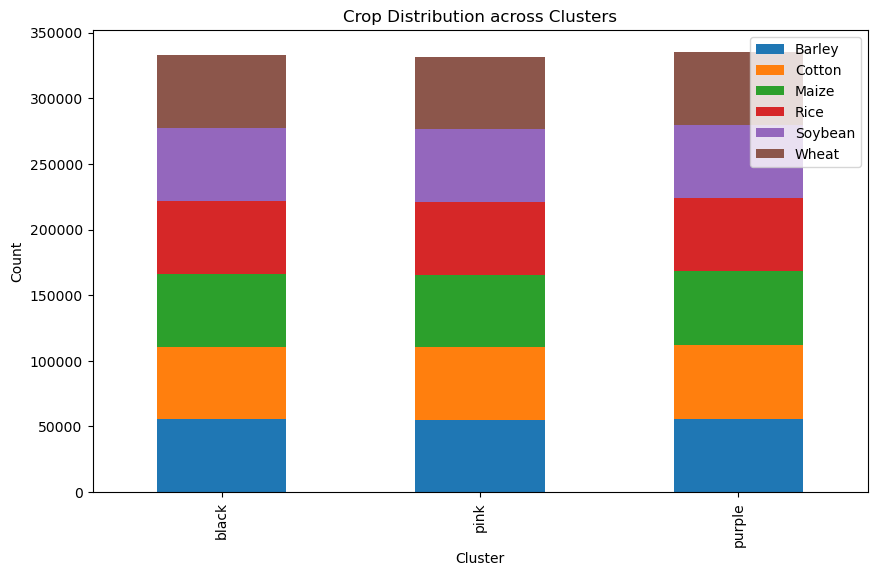

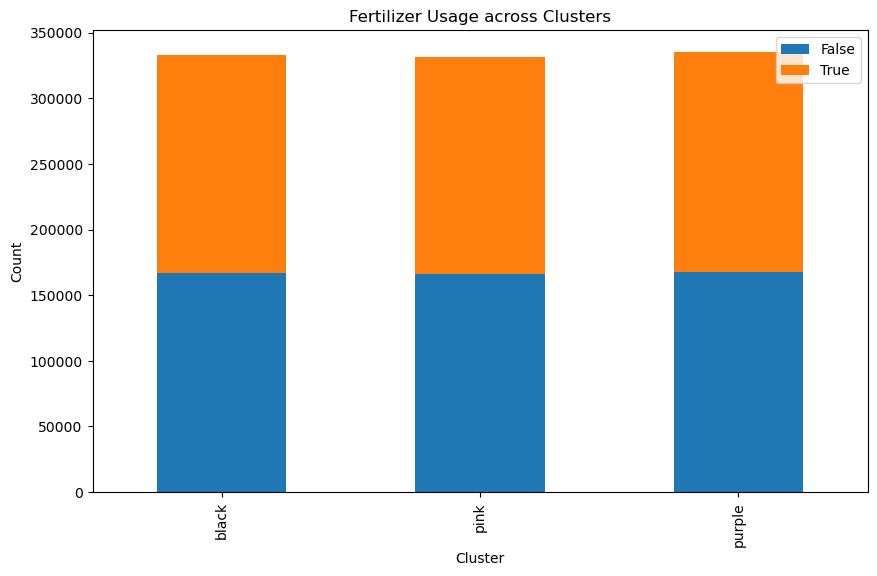

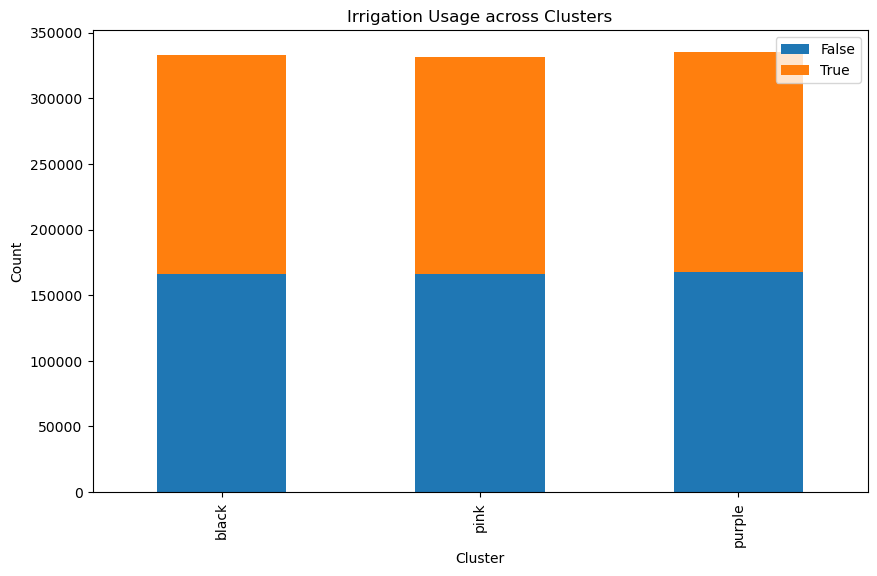

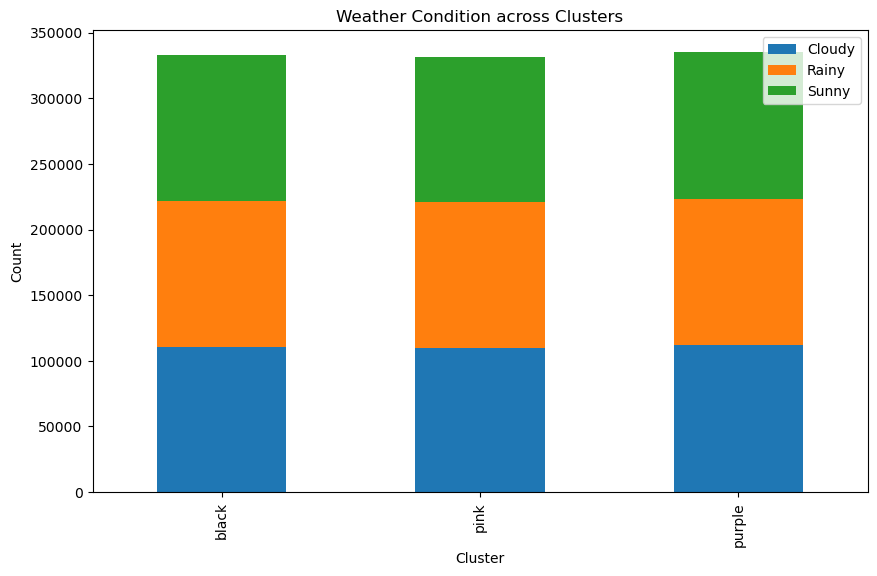

In [68]:
# Create contingency tables for each categorical variable
soil_cluster = pd.crosstab(df_merged['cluster'], df_merged['Soil_Type'])
crop_cluster = pd.crosstab(df_merged['cluster'], df_merged['Crop'])
fert_cluster = pd.crosstab(df_merged['cluster'], df_merged['Fertilizer_Used'])
irrigation_cluster = pd.crosstab(df_merged['cluster'], df_merged['Irrigation_Used'])
weather_cluster = pd.crosstab(df_merged['cluster'], df_merged['Weather_Condition'])

# Display the contingency tables
print("Soil Type vs Clusters")
print(soil_cluster)

print("\nCrop vs Clusters")
print(crop_cluster)

print("\nFertilizer Used vs Clusters")
print(fert_cluster)

print("\nIrrigation Used vs Clusters")
print(irrigation_cluster)

print("\nWeather Condition vs Clusters")
print(weather_cluster)

# Visualization of categorical variables across clusters
def plot_categorical_distribution(crosstab, title):
    crosstab.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.show()

# Visualizing each categorical variable
plot_categorical_distribution(soil_cluster, 'Soil Type Distribution across Clusters')
plot_categorical_distribution(crop_cluster, 'Crop Distribution across Clusters')
plot_categorical_distribution(fert_cluster, 'Fertilizer Usage across Clusters')
plot_categorical_distribution(irrigation_cluster, 'Irrigation Usage across Clusters')
plot_categorical_distribution(weather_cluster, 'Weather Condition across Clusters')

There is even distribution across each cluster. This is not surprising.

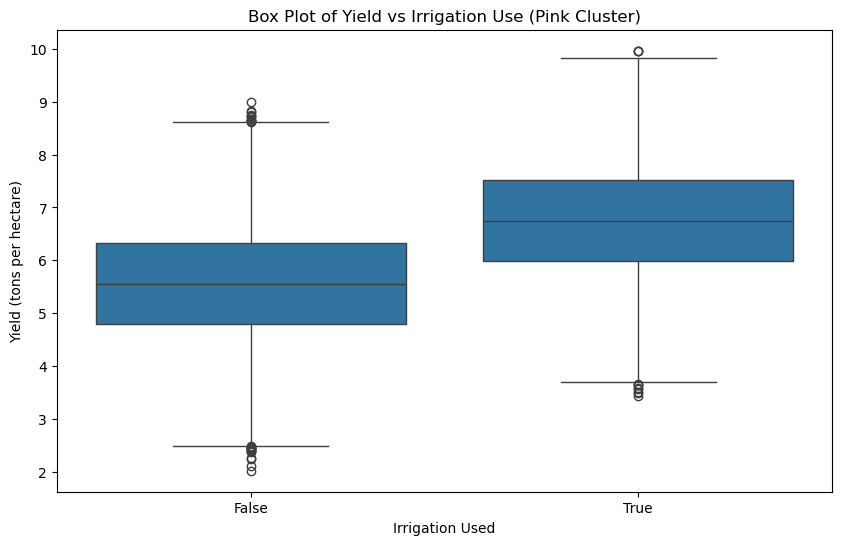

In [70]:
# Filter dataset for 'pink' cluster
pink_cluster_subset = df_merged[df_merged['cluster'] == 'pink']

# Create box plot of Yield_tons_per_hectare based on Irrigation_Used
plt.figure(figsize=(10, 6))
sns.boxplot(x='Irrigation_Used', y='Yield_tons_per_hectare', data=pink_cluster_subset)

# Add labels and title
plt.xlabel('Irrigation Used')
plt.ylabel('Yield (tons per hectare)')
plt.title('Box Plot of Yield vs Irrigation Use (Pink Cluster)')

# Show the plot
plt.show()

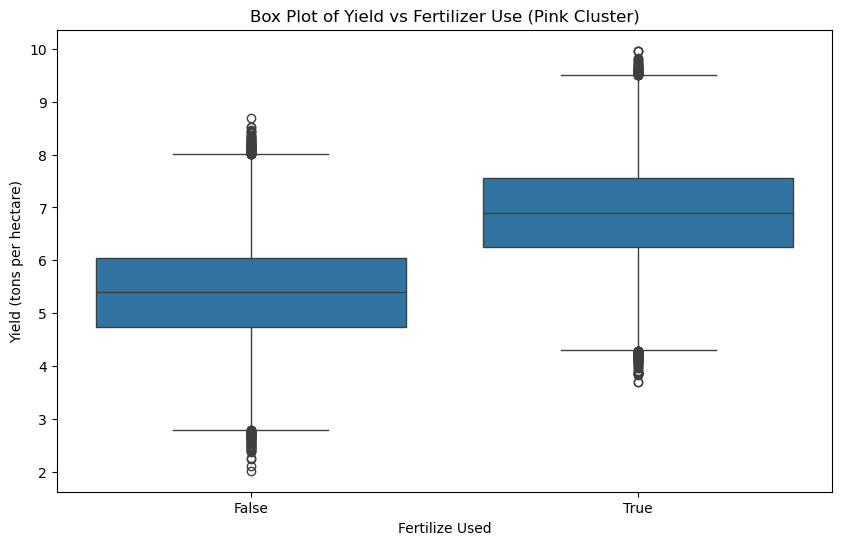

In [71]:
# Create box plot of Yield_tons_per_hectare based on Fertilizer_Used
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=pink_cluster_subset)

# Add labels and title
plt.xlabel('Fertilize Used')
plt.ylabel('Yield (tons per hectare)')
plt.title('Box Plot of Yield vs Fertilizer Use (Pink Cluster)')

# Show the plot
plt.show()


In the box plots above, we can see that the use of irrigation and fertilizer is needed to increase yields. This is important to note because this is the cluster of drier climates. By using these agriculture practices it will increase the yield in a difficult environment for crop growth.

## 10. Export data

In [210]:
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'crop_yield_v3.pkl'))

In [117]:
df_merged.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'crop_yield_v3.csv'))